In [1]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
import yaml
import pyntbci
sns.set_context('paper', font_scale =1.5)


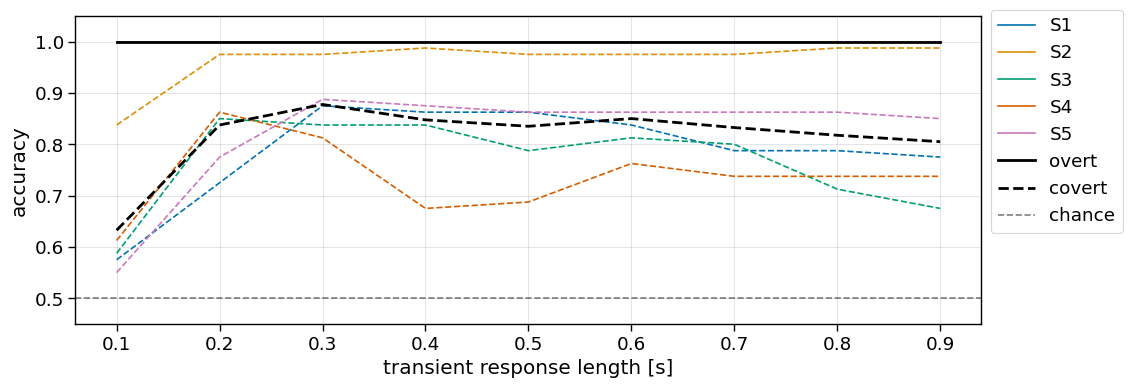

In [2]:
results_path = r'C:\Users\s1081686\Desktop\RA_Project\graz_conference\analysis\result_variables'
# 1. plotting accuracy across all transient sizes 

with open(os.path.join(results_path,'accuracy_across_transient_responses.pickle'), 'rb') as handle:
    data_both_conditions = pickle.load(handle)

accuracy_all_subjects_overt = data_both_conditions['overt_condition']  # (n_subjects x n_transient_sizes x n_folds)
accuracy_all_subjects_covert = data_both_conditions['covert_condition']

# relevant parameters for the plot
transient_size_vec = np.arange(0.1, 1, 0.1)
n_subjects = accuracy_all_subjects_overt.shape[0]
n_folds = accuracy_all_subjects_overt.shape[2]
colors = sns.color_palette('colorblind')

# averaging accuracies over folds
accuracy_across_folds_overt = accuracy_all_subjects_overt.mean(axis = 2)    
accuracy_across_folds_covert =accuracy_all_subjects_covert.mean(axis = 2)

#plotting data for all subjects:
plt.figure(figsize= (11.69, 4))
for i in range(n_subjects):

    # overt
    plt.plot(transient_size_vec, accuracy_across_folds_overt[i,:], color = colors[i] ,label = f"S{i+1}")
   
    # covert
    plt.plot(transient_size_vec, accuracy_across_folds_covert[i,:], color = colors[i], label = f"_S{i+1}", linestyle = '--')

# computing grand averages (mean across subjects and folds)
accuracy_across_subjects_overt = accuracy_across_folds_overt.mean(axis = 0)
accuracy_across_subjects_covert = accuracy_across_folds_covert.mean(axis = 0)

# plotting grand averages
plt.plot(transient_size_vec, accuracy_across_subjects_overt,  label = 'overt', color='k', linewidth= 2)
plt.plot(transient_size_vec, accuracy_across_subjects_covert, label = 'covert', linestyle ='--', color='k', linewidth= 2)
plt.axhline(0.5, linestyle = '--', color = 'k',label = 'chance', alpha = 0.5)

# labels for axes
plt.xlabel('transient response length [s]')
plt.ylim([0.45,1.05])
plt.ylabel('accuracy')
plt.legend(bbox_to_anchor=(1, 1.05))
plt.grid(visible = True, which = 'major', color = 'k', alpha =0.1)


In [3]:
# 2. Table for mean accuracies across folds at optimum transient response length
with open(os.path.join(results_path,'mean_accuracy_at_optimum_response_length.pickle'), 'rb') as handle:
    data_both_conditions = pickle.load(handle)
    
# getting data for both conditions
mean_accuracy_overt = data_both_conditions['overt_condition'].flatten()
mean_accuracy_covert = data_both_conditions['covert_condition'].flatten()

# adding grand average of the accuracies as the last element
overt_row = np.zeros((len(mean_accuracy_overt) + 1))
overt_row[:-1] = mean_accuracy_overt
overt_row[-1] = np.mean(mean_accuracy_overt)

covert_row = np.zeros((len(mean_accuracy_covert) + 1))
covert_row[:-1] = mean_accuracy_covert
covert_row[-1] = np.mean(mean_accuracy_covert)
print(covert_row)
covert_row = [round(val,2) for val in covert_row]

# rows and columns
rows = ['Overt', 'Covert']
columns = ["S1", "S2", "S3", "S4", "S5", "Avg"]

# create dataframe
df = pd.DataFrame([overt_row, covert_row], index=rows, columns=columns)
print(df)

[0.875  0.975  0.8375 0.8125 0.8875 0.8775]
          S1    S2    S3    S4    S5   Avg
Overt   1.00  1.00  1.00  1.00  1.00  1.00
Covert  0.88  0.98  0.84  0.81  0.89  0.88


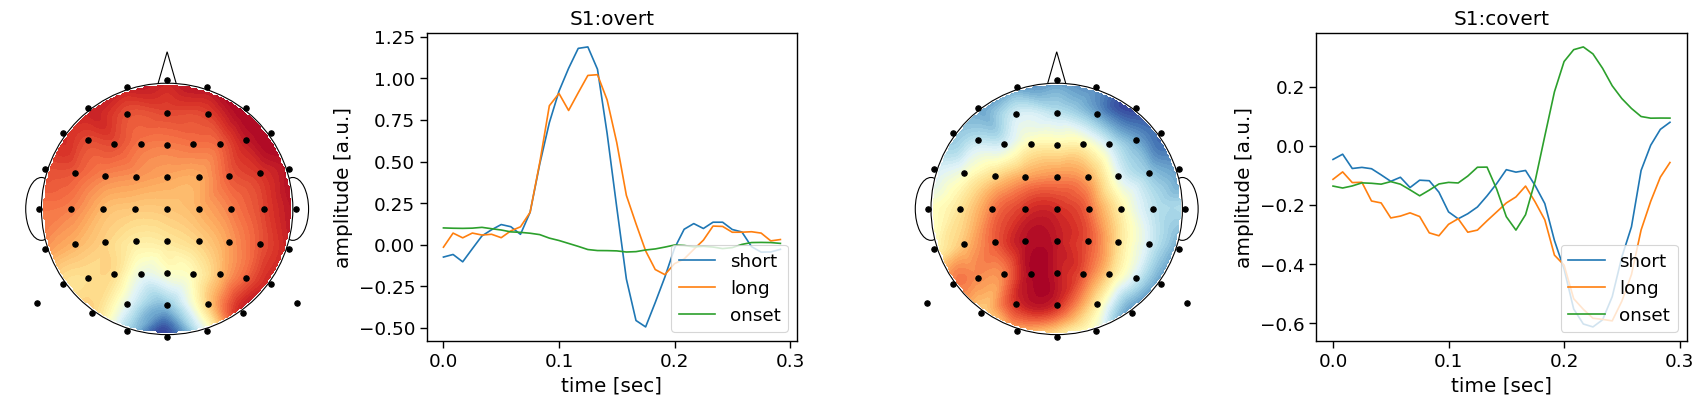

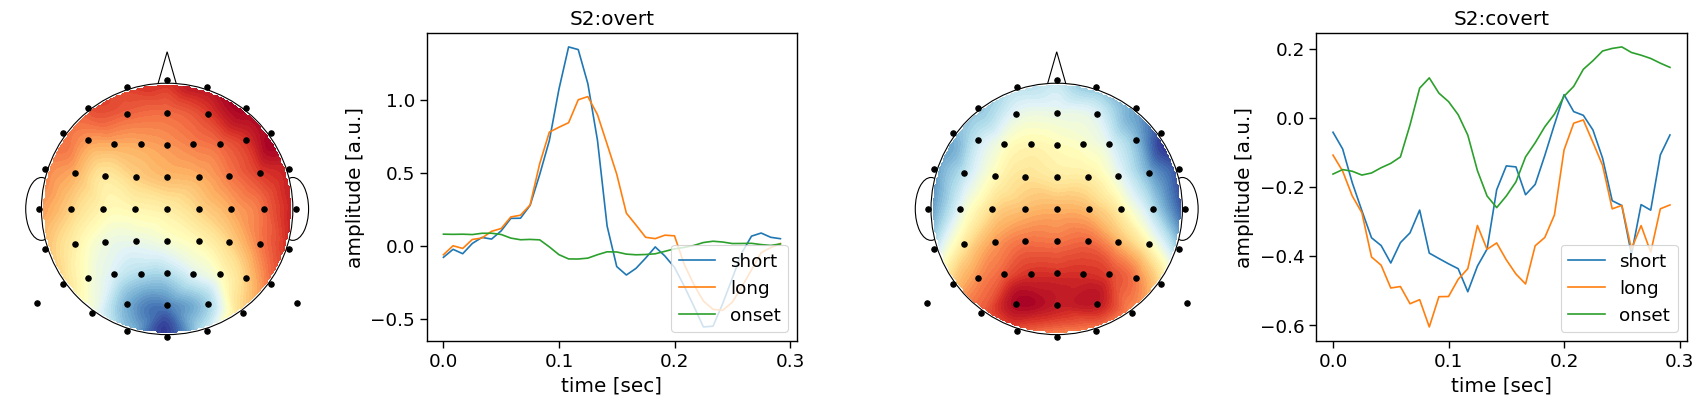

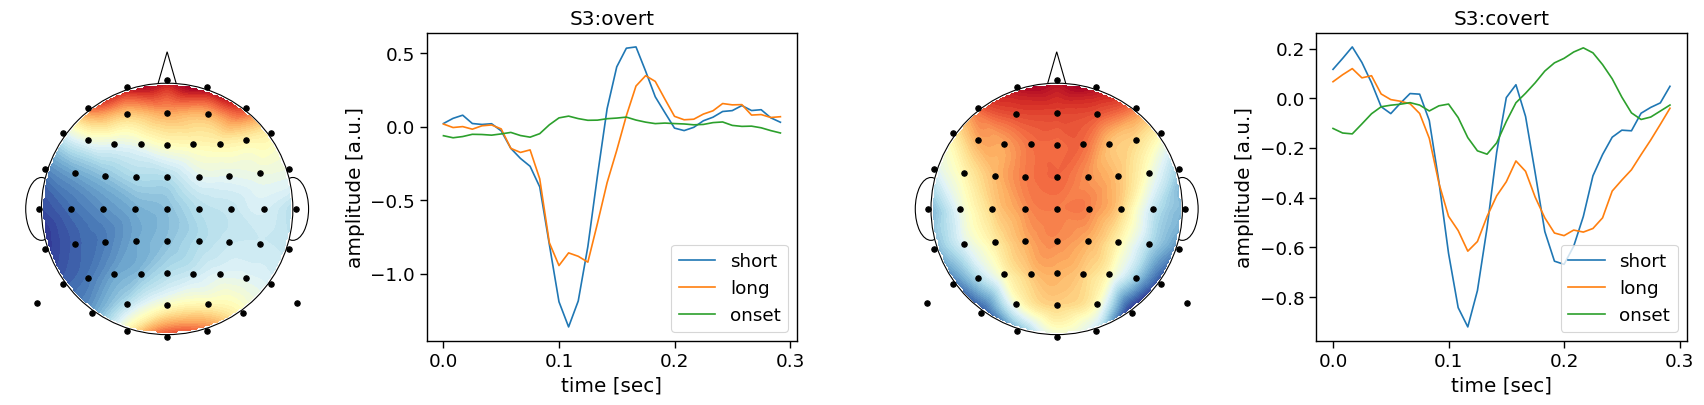

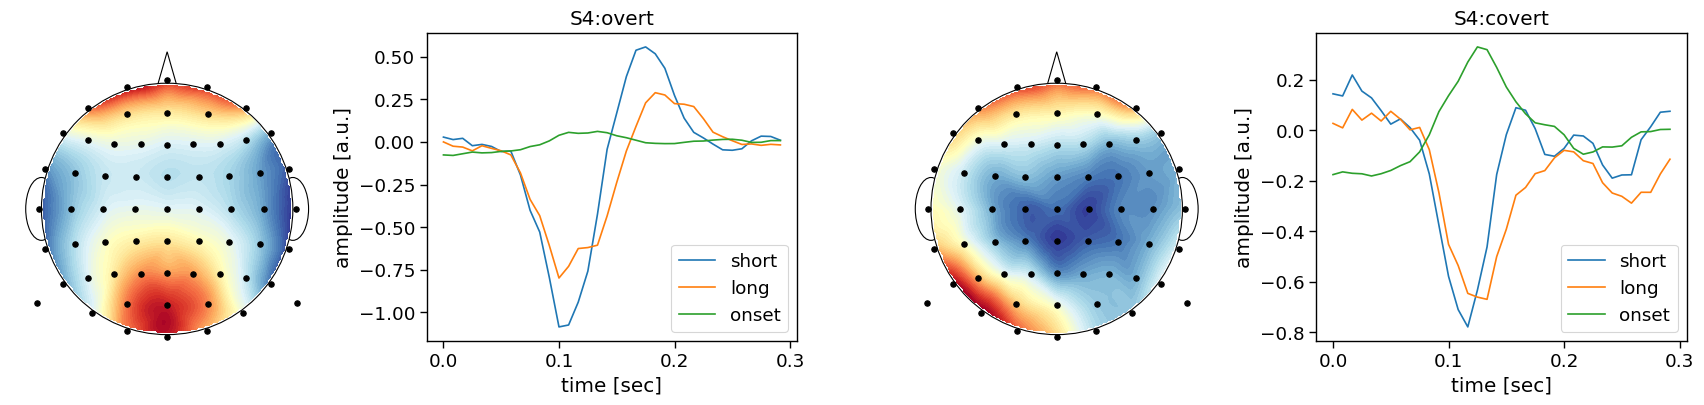

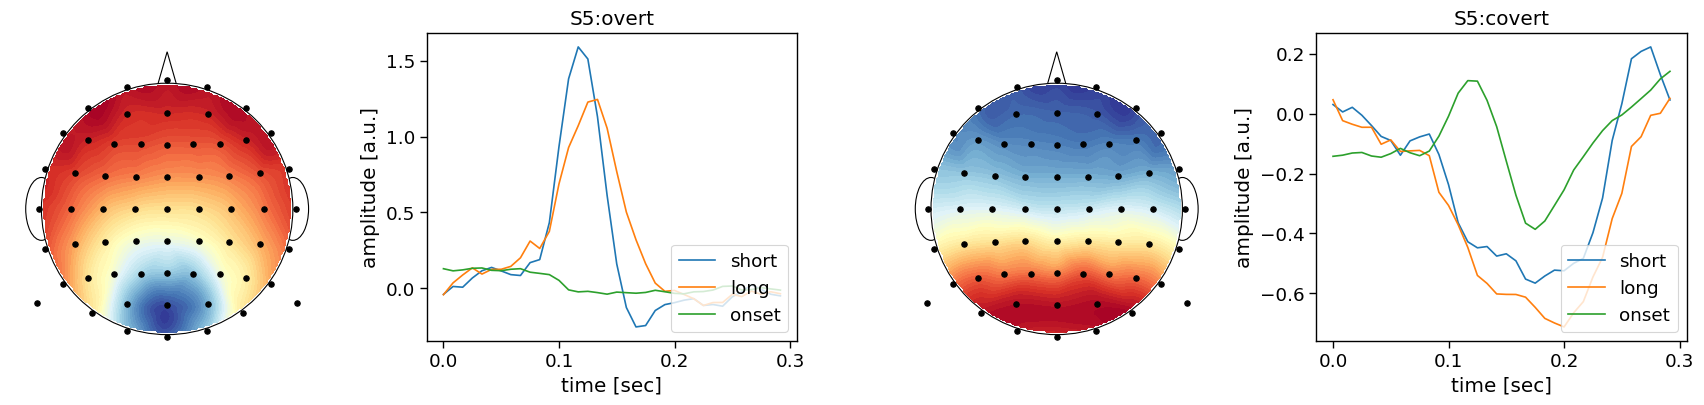

In [5]:
# loading relevant data
with open(os.path.join(results_path,'spatial_activity_and_transient_responses.pickle'), 'rb') as handle:
    data_both_conditions = pickle.load(handle)
    
spatial_act_overt = data_both_conditions['activity_pattern_overt']
trans_resp_overt = data_both_conditions['transient_response_overt']

spatial_act_covert = data_both_conditions['activity_pattern_covert']
trans_resp_covert = data_both_conditions['transient_response_covert']

# participant info
with open(r"C:\Users\s1081686\Desktop\RA_Project\graz_conference\config.yml", "r") as yaml_file:
    config_data = yaml.safe_load(yaml_file)

analysis_params = config_data['analysis_params']

# preprocessed eeg data filenames of all participants
subjects_overt = analysis_params['subjects_overt']
subjects_covert = analysis_params['subjects_covert']
capfile_path = analysis_params['CAPFILE_PATH']
fs = analysis_params['Fs']
events = ['short', 'long', 'onset']
transient_size = 0.3

# plotting overt data : note, the polarity of cca is arbritary. The responses or the filters may be inverted
for sub in range(len(subjects_covert)): 
        
    _, ax = plt.subplots(1,4, figsize=(22, 4))
    
    pyntbci.plotting.topoplot(spatial_act_overt[sub], capfile_path , ax=ax[0])

    tmp = np.reshape(trans_resp_overt[sub], (len(events), -1))
    for i in range(len(events)):
        ax[1].plot(np.arange(int(transient_size * fs)) / fs, tmp[i, :])
        
        
    ax[1].legend(['short', 'long', 'onset'], loc = 'lower right')
    ax[1].set_xlabel("time [sec]")
    ax[1].set_ylabel("amplitude [a.u.]")
    ax[1].set_title(f"S{sub+1}:overt")
    
    
    pyntbci.plotting.topoplot(-spatial_act_covert[sub], capfile_path , ax=ax[2])

    tmp = np.reshape(-trans_resp_covert[sub], (len(events), -1))
    for i in range(len(events)):
        ax[3].plot(np.arange(int(transient_size * fs)) / fs, tmp[i, :])
        
    ax[3].legend(['short', 'long', 'onset'], loc = 'lower right')
    ax[3].set_xlabel("time [sec]")
    ax[3].set_ylabel("amplitude [a.u.]")
    plt.title(f"S{sub+1}:covert")



In [ ]:
# Supplementary info: histograms from permutation testing
'TODO: the histograms for overt condition need to be corrected'

# load files
with open(r"C:\Users\s1081686\Desktop\RA_Project\Scripts\gratz_conference\variables\overt_permutation_test_var.pkl", 'rb') as pickle_file:
    overt_dict_permutation_testing = pickle.load(pickle_file)
    
with open(r"C:\Users\s1081686\Desktop\RA_Project\Scripts\gratz_conference\variables\covert_permutation_test_var.pkl", 'rb') as pickle_file:
    covert_dict_permutation_testing = pickle.load(pickle_file)
    
for i_subject in range(n_subjects):
    
    rand_acc_cov = covert_dict_permutation_testing[f'S{i_subject+1}_rand_acc_vec']
    obs_acc_cov = covert_dict_permutation_testing[f'S{i_subject+1}_observed_acc']
    
    rand_acc_ov = overt_dict_permutation_testing[f'S{i_subject+1}_rand_acc_vec']
    obs_acc_ov = overt_dict_permutation_testing[f'S{i_subject+1}_observed_acc']
    
    pvalue_cov = np.mean(rand_acc_cov >= obs_acc_cov)
    pvalue_ov = np.mean(rand_acc_ov>= obs_acc_ov)
    
    np.set_printoptions(threshold= np.inf)
    print(f"pvals cov,ov",pvalue_cov,pvalue_ov)
    covert_dict_permutation_testing[f"S{i_subject+1}_pval"] = pvalue_cov
    overt_dict_permutation_testing[f"S{i_subject+1}_pval"] = pvalue_ov

    plt.figure(figsize = (10,4))
    plt.subplot(121)
    plt.hist(rand_acc_cov)
    plt.axvline(obs_acc_cov, color = "r")
    plt.axvline(np.mean(rand_acc_cov), color = "y")
    plt.title(f'covert S{i_subject+1}')

    plt.subplot(122)
    plt.hist(rand_acc_ov)
    plt.axvline(obs_acc_cov, color = "r")
    plt.axvline(np.mean(rand_acc_ov), color = "y")
    plt.title(f'overt S{i_subject+1}')